In [ ]:
#pip install seaborn

In [1]:
#Import Libraries
import sys
sys.path
import seaborn as sns
import sklearn as sk 
import sys
import pandas as pd
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn 
%matplotlib inline
from sklearn.model_selection import train_test_split 
#from sklearn.naive_bayes import GuassianNB
#this allows us to be able to do the splitting of the data into training and test sets


In [2]:
os.getcwd()

'/Users/Chinyemba/Desktop/Enhance IT Assignments/Week_2'

In [3]:
os.listdir(os.getcwd())


['.Rhistory',
 'mnist_training_data.csv',
 'MNIST_data_Preparation.Rmd',
 'MySQL Cconnection',
 'Untitled1.ipynb',
 '.DS_Store',
 'The NumPy Stack.ipynb',
 'Untitled.ipynb',
 'rds_cred_walmart.json',
 '.RData',
 'mnist_training.csv',
 'Week_2_Bayes_task.ipynb',
 '.ipynb_checkpoints',
 'rds_cred_MNIST.json',
 'mnist_test_data.csv',
 'mnist_test.csv']

In [4]:
#training data
df_train = pd.read_csv('mnist_training.csv')
df_train.head()


,Unnamed: 0,index,Unnamed: 0.1,0,1,2,3,4,5,6,...,775,776,777,778,779,780,781,782,783,labels
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,4,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
#drop unwanted columns
df_train =  df_train.drop(['Unnamed: 0', 'index', 'Unnamed: 0.1'], axis=1)
df_train.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
df_train.shape

(60000, 785)

In [7]:
#test data
df_test = pd.read_csv("mnist_test.csv")
df_test.head()

,Unnamed: 0,index,Unnamed: 0.1,0,1,2,3,4,5,6,...,775,776,777,778,779,780,781,782,783,labels
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [8]:
#drop some unwanted columns from test dataset
df_test =  df_test.drop(['Unnamed: 0', 'index', 'Unnamed: 0.1'], axis=1)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [9]:
#Convert the training data frame to numpy array
X = df_train.to_numpy()
X.shape

(60000, 785)

In [10]:
#Convert the testing data frame to numpy array
X2 = df_test.to_numpy()
X2.shape

(10000, 785)

In [11]:
X[0,:-1].reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
Y = X[:,-1]
Y
X=X[:,:-1] # first two roles excluding the first on
X
#X = float(X) #convert every X to float

#in this case we have fed it with X, Y train data sets, and now remaining the X test and Y^

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
X.shape #check the number of observations and variables

(60000, 784)

In [14]:
Y.shape 

(60000,)

In [52]:
#We try and visualise some images of the digits, from one of the labels
Y[300]

8

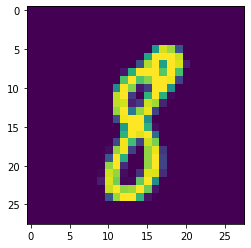

In [59]:
#we visualise labels
digit = X[300]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap = 'viridis')
#plt.axis("off")
plt.show()

In [42]:
#Split the dataset into training and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,
    test_size=0.2,
    random_state=123)


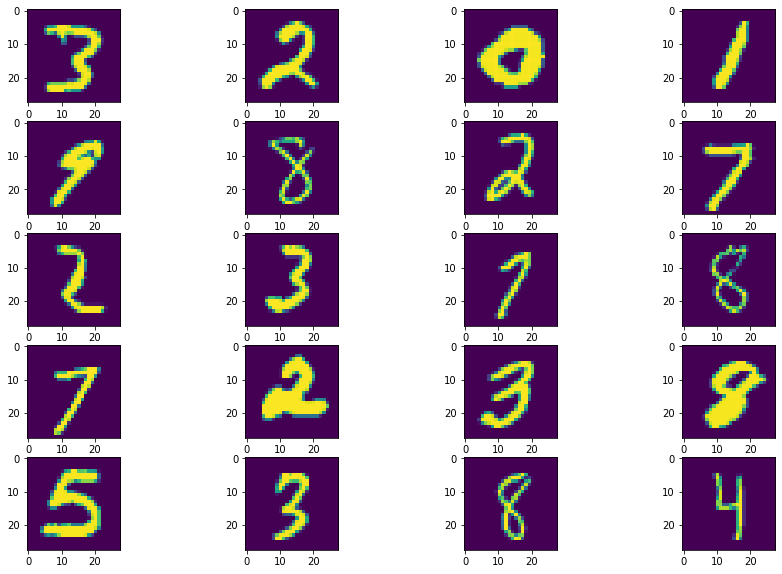

In [61]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(15,12))
x, y = 4, 6
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)))
plt.show()

In [25]:
#The NB Classifier

class GuassNB():
    def fit(self, X, y, e=100):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))
        for k in self.K:
            X_k = X[y == k]
            self.likelihoods[k] = {'mean': X_k.mean(axis=0),\
                                   'var': X_k.var(axis=0) + e}
            self.priors[k] = len(X_k)/len(X)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        P = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            P[:,k] = mvn.logpdf(X, l['mean'], l['var']) + np.log(self.priors[k])
        return np.argmax(P, axis=1)
    
    def get_confusion(self, x, y):
        n = len(self.K)
        confusion_matrix = np.zeros((n,n))
        for k in range (n):
            y_hat = self.predict(X[Y==k])
            for j in range (n):
                confusion_matrix[k,j] = sum(y_hat==j)
            confusion_matrix[k] = confusion_matrix[k]/sum(confusion_matrix[k])
        return np.round(confusion_matrix,2)
    
def accuracy(Y, y_hat):
    return np.mean(Y==y_hat)


In [27]:
x_train.shape

(48000, 784)

In [28]:
y_train.shape

(48000,)

In [29]:
#Lables
X, y = df_train.to_numpy()[:,:-1], df_train.to_numpy()[:,-1]
X.shape, y.shape


((60000, 784), (60000,))

In [30]:
#Trianing 
clf_gNB =  GuassNB()
clf_gNB.fit(X, y)
pred = clf_gNB.predict(X)
pred


array([3, 0, 4, ..., 5, 6, 8])

In [31]:
print("\nAccurancy: " + str(accuracy(y, pred)*100) + "%")


Accurancy: 77.62166666666667%


In [32]:
## Test Model

In [33]:
X2, y2 = df_test.to_numpy()[:,:-1], df_test.to_numpy()[:,-1]
X2.shape, y2.shape

((10000, 784), (10000,))

In [34]:
clf_gNB2 =  GuassNB()
clf_gNB2.fit(X2, y2)
pred2 = clf_gNB2.predict(X2)
pred2

array([7, 2, 1, ..., 9, 8, 6])

In [35]:
print("\nAccurancy: " + str(accuracy(y2, pred2)*100) + "%")


Accurancy: 79.81%


In [36]:
#Confusion Matrix


In [37]:
cm = clf_gNB.get_confusion(x_test, y_test)

Text(0.5, 1, 'Confusion Matrix')

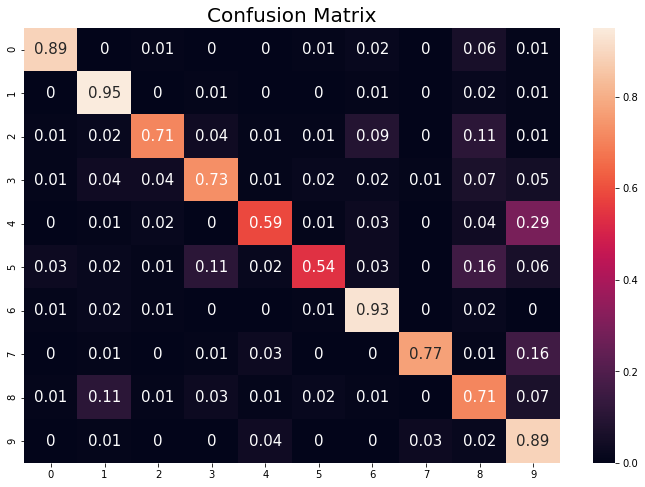

In [41]:
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, annot_kws = {'fontsize': 15})
plt.title('Confusion Matrix', fontsize = 20)